In [1]:
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Activation, Flatten, GlobalAveragePooling2D
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
from google.colab import files

uploaded = files.upload()

In [2]:
from google.colab import files

uploaded = files.upload()

Saving train_data.zip to train_data (1).zip


In [0]:
import zipfile
zip_ref1 = zipfile.ZipFile('train_data.zip', 'r')
zip_ref1.extractall('train_data')
zip_ref1.close()

zip_ref2 = zipfile.ZipFile('test_data.zip', 'r')
zip_ref2.extractall('test_data')
zip_ref2.close()

In [0]:
import zipfile
zip_ref1 = zipfile.ZipFile('train_data.zip', 'r')
zip_ref1.extractall('train_data1')
zip_ref1.close()

## Labels dictionary

In [0]:
labels_dict={0:'bulbasaur', 1:'jigglypuff', 2:'mewto', 3:'pikachu', 4:'squirtle'}

# Building the model

We'll use transfer learning because we have little data. So we used pretrained VGG16 model on imagenet dataset

In [0]:
num_classes = 5

pok_model = Sequential()
pok_model.add(VGG16(include_top=False, pooling='avg', weights='imagenet')) 
pok_model.add(Dense(num_classes, activation='softmax'))
#we'll not train the first layer (vgg model)
pok_model.layers[0].trainable = False

# Compile the model

In [0]:
pok_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation

In [5]:
image_size = 64
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   rotation_range=20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory(
        'train_data1/train_data',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        'test_data/test_data',
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 580 images belonging to 5 classes.
Found 71 images belonging to 5 classes.


# fitting the model

## Saving the best model

In [0]:
model_name='deepPokemon'

checkpointer = ModelCheckpoint(
    filepath=os.path.join(model_name + '.hdf5'),
    monitor='val_loss', verbose=1, save_best_only=True, mode='min', period=1)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min', verbose=1)

tensorboard = TensorBoard(log_dir='./Graph/'+model_name,
                          histogram_freq=0,
                          batch_size=24, 
                          write_graph=True, 
                          write_grads=False, 
                          write_images=False, 
                          embeddings_freq=0, 
                          embeddings_layer_names=None, 
                          embeddings_metadata=None)

In [7]:
history=pok_model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs=150,
        validation_data=validation_generator,
        validation_steps=1,
        callbacks=[checkpointer, tensorboard])

Epoch 1/150
5/5 [==============================] - 2s 440ms/step - loss: 11.7235 - acc: 0.1333 - val_loss: 11.2857 - val_acc: 0.0625

Epoch 00001: val_loss improved from inf to 11.28569, saving model to deepPokemon.hdf5
Epoch 2/150
5/5 [==============================] - 0s 66ms/step - loss: 10.7410 - acc: 0.1417 - val_loss: 10.0557 - val_acc: 0.0938

Epoch 00002: val_loss improved from 11.28569 to 10.05574, saving model to deepPokemon.hdf5
Epoch 3/150
5/5 [==============================] - 0s 86ms/step - loss: 10.7601 - acc: 0.1894 - val_loss: 8.9199 - val_acc: 0.2188

Epoch 00003: val_loss improved from 10.05574 to 8.91995, saving model to deepPokemon.hdf5
Epoch 4/150
5/5 [==============================] - 0s 58ms/step - loss: 8.3023 - acc: 0.2750 - val_loss: 8.3720 - val_acc: 0.2500

Epoch 00004: val_loss improved from 8.91995 to 8.37200, saving model to deepPokemon.hdf5
Epoch 5/150
5/5 [==============================] - 0s 55ms/step - loss: 7.3655 - acc: 0.2917 - val_loss: 7.9846 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


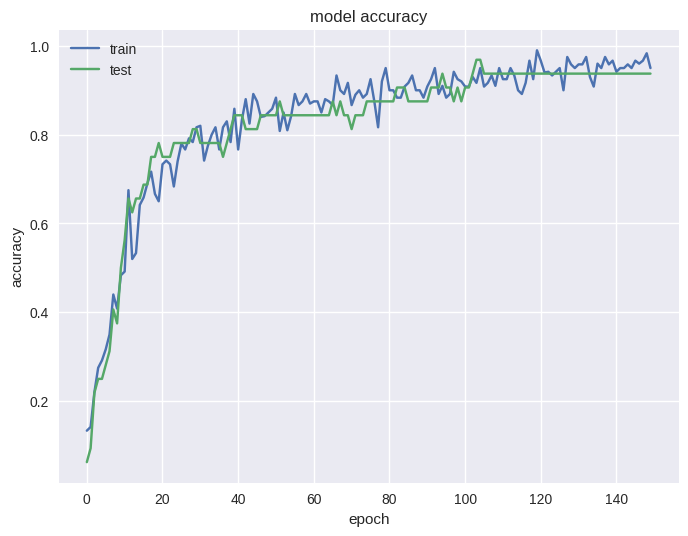

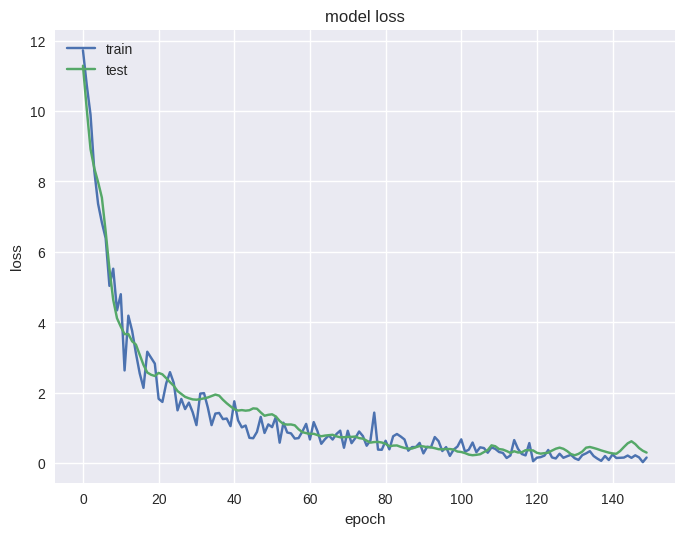

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join('model accuracy 3.png'))
plt.show()
# summarize history for loss
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join('model loss 3.png'))
plt.show()

# Testing the model on extra pictures (not included in the train and test data)

In [9]:
best_model = load_model('deepPokemon.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/models.py:318: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


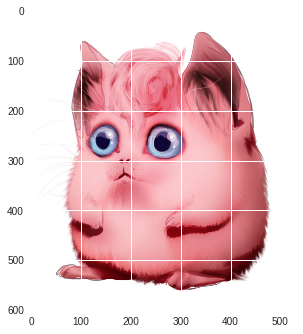

In [9]:
import matplotlib.image as mpimg
image = mpimg.imread("jigg.jpg")
plt.imshow(image)

In [27]:
image = load_img('jigg.jpg', target_size=(64, 64))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
pokemon = best_model.predict_classes(image)
labels_dict[pokemon[0]]

'jigglypuff'

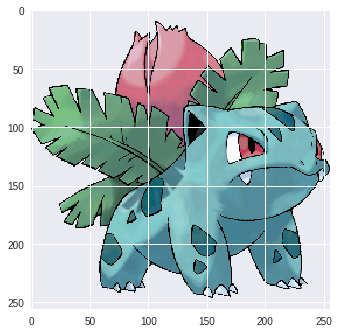

In [10]:
image = mpimg.imread("bulb.png")
plt.imshow(image)

In [28]:
image2 = load_img('bulb.png', target_size=(64, 64))
image2 = img_to_array(image2)
image2 = image.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
image2 = preprocess_input(image2)
pokemon = best_model.predict_classes(image2)
labels_dict[pokemon[0]]

'bulbasaur'

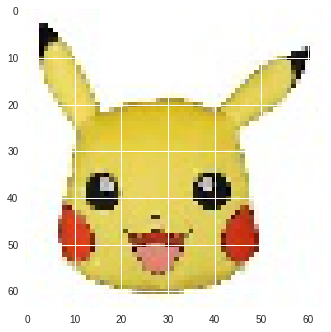

In [11]:
image = mpimg.imread("pikatsuu.jpg")
plt.imshow(image)

In [38]:
image3 = load_img('pikatsuu.jpg', target_size=(64, 64))
image3 = img_to_array(image3)
image3 = image.reshape((1, image3.shape[0], image3.shape[1], image3.shape[2]))
image3 = preprocess_input(image3)
pokemon = best_model.predict_classes(image3)
labels_dict[pokemon[0]]

'jigglypuff'